In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing


In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [35]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [10]:
X = df[['Present_Price','Fuel_Type', 'Transmission','Kms_Driven']]
y = df.Selling_Price
X = pd.get_dummies(data=X)

In [11]:
X.head(3)

,Present_Price,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,0,1,0,1
1,9.54,43000,0,1,0,0,1
2,9.85,6900,0,0,1,0,1


In [8]:
###from sklearn import preprocessing
###X = preprocessing.scale(X)
##y = preprocessing.scale(y)

In [21]:
#Data Normalization
X= preprocessing.normalize(X, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=10)

In [26]:
from sklearn import neighbors
# the value of n_neighbors will be changed when we plot the histogram showing the lowest RMSE value
knn = neighbors.KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

predicted = knn.predict(X_test)
residual = y_test - predicted
predicted


array([ 8.0875,  0.895 ,  2.6625,  1.3375,  5.075 ,  7.3625, 18.5625,
        0.2925,  0.6125,  4.1875,  0.745 ,  7.3625,  3.925 ,  0.515 ,
        3.75  ,  4.35  ,  4.0875,  0.24  ,  2.6625,  5.625 ,  0.995 ,
        3.3125,  8.525 ,  9.7625,  0.3425,  0.595 ,  0.2425,  0.4   ,
        0.8325,  0.2925,  2.4725, 16.3875,  6.125 ,  8.6875,  0.5675,
        6.95  ,  4.875 ,  4.4375,  1.74  ,  3.8875,  4.2625,  0.3075,
        4.95  ,  0.395 ,  8.5625,  3.875 ,  0.2925,  4.4625,  7.325 ,
        3.325 ,  0.4075,  4.525 ,  0.4625, 11.4375,  3.975 ,  5.05  ,
       10.8125,  1.1125,  7.4   , 15.3375,  3.975 ])

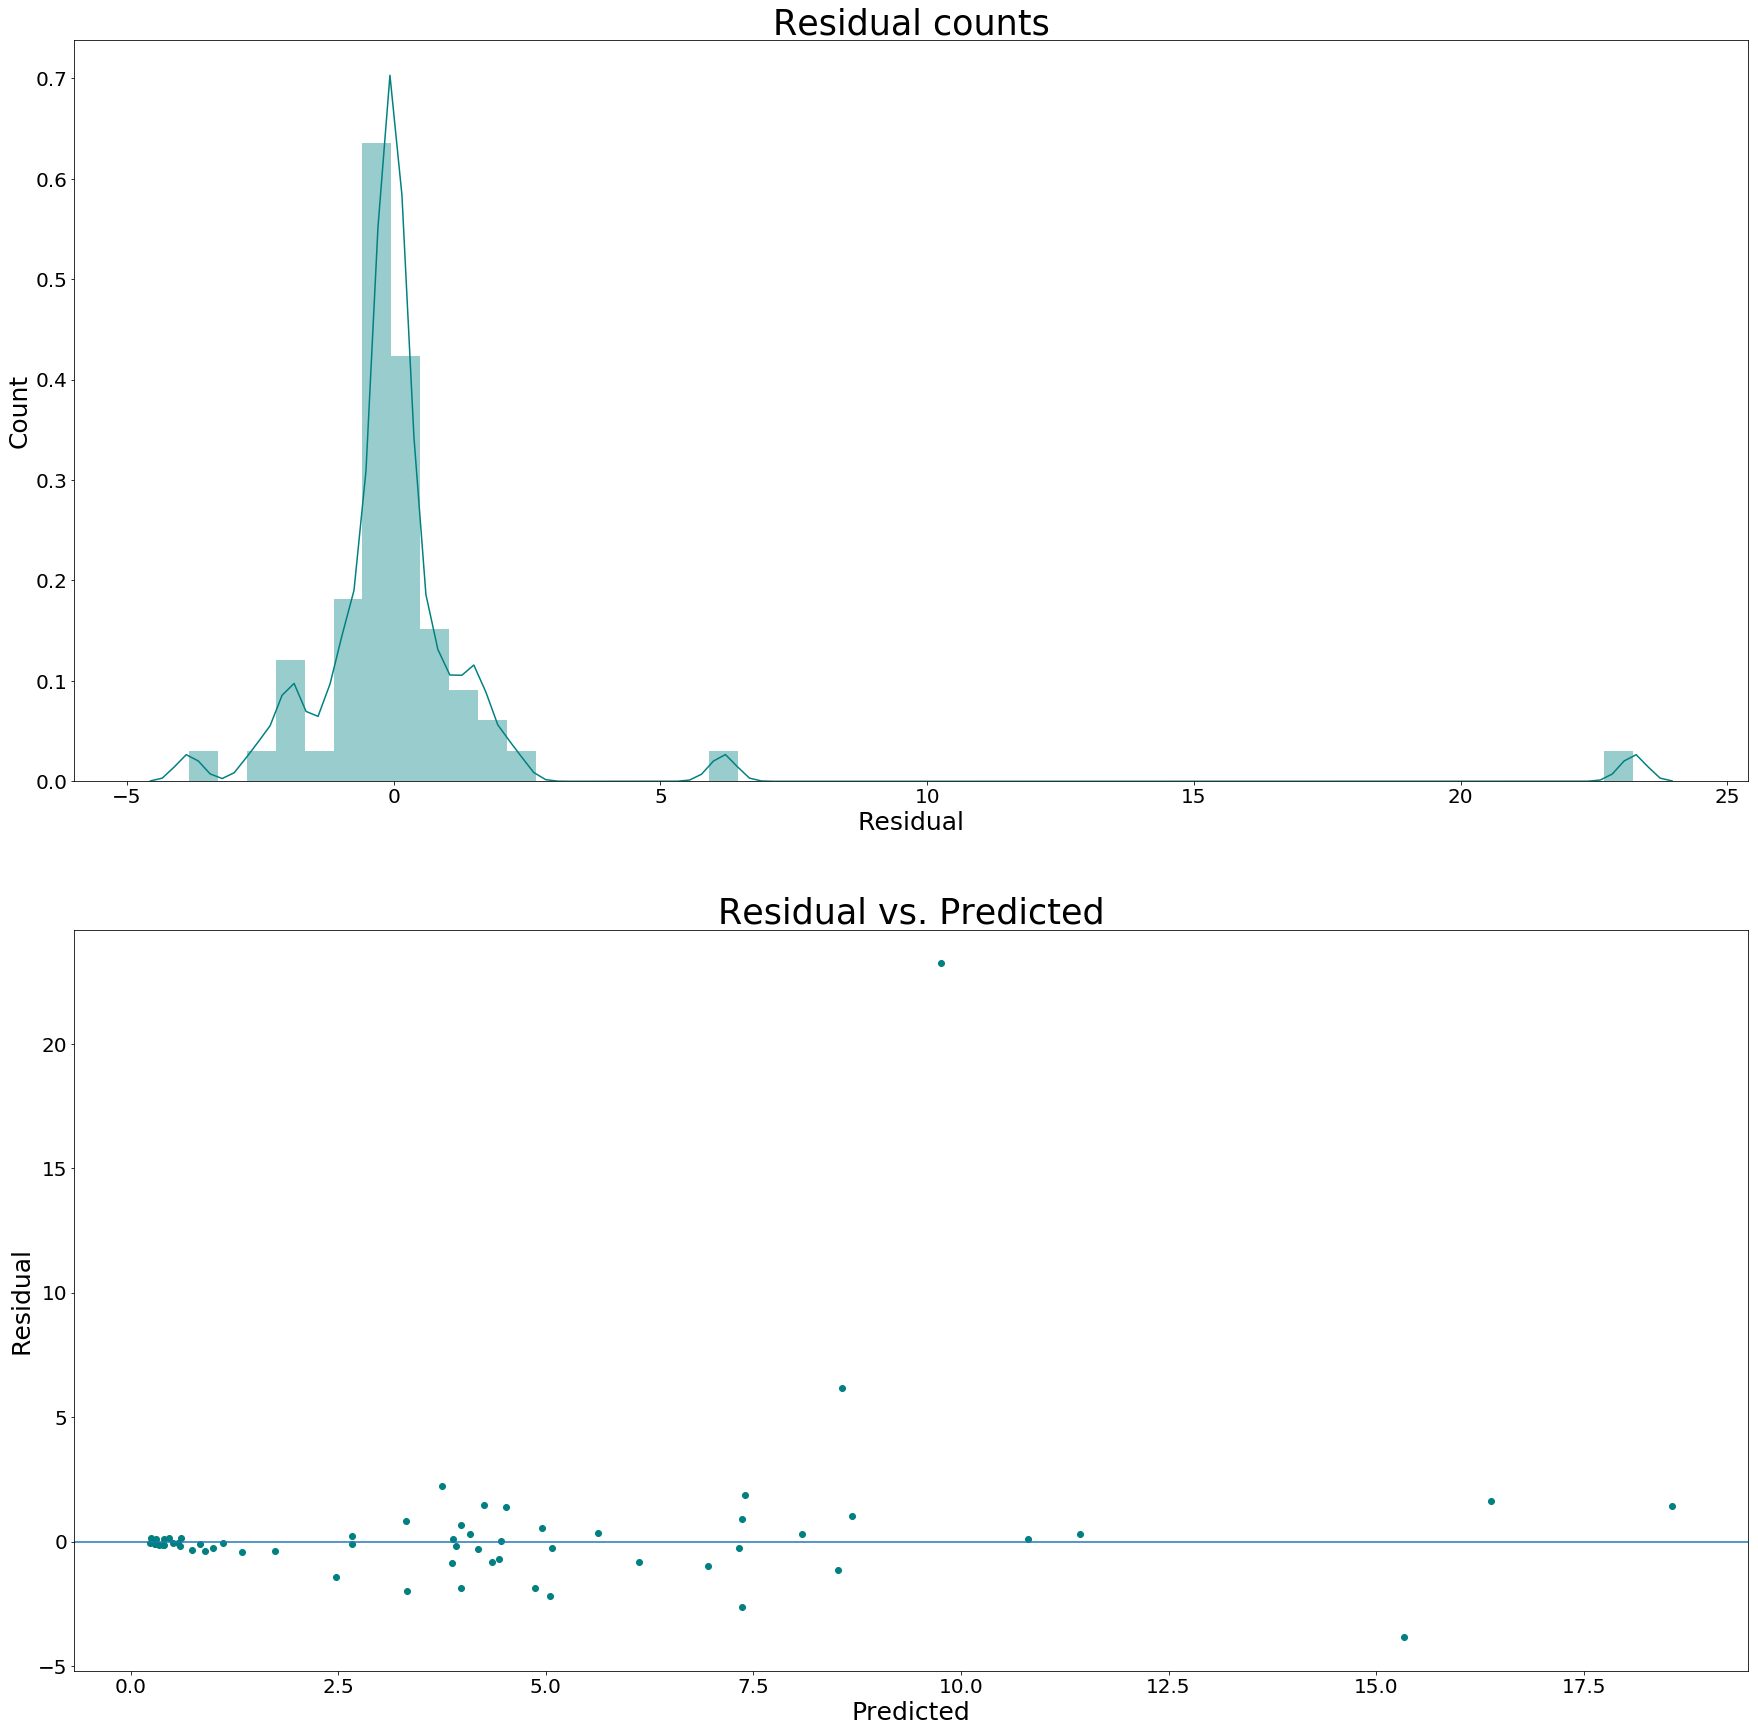

RMSE:
3.250253489483803


In [27]:
import seaborn as sns
fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)

In [28]:
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
print(f'Mean Squared Error of Test Set : {mse}')
print(f'Root Mean Square Error of Test Set : {rmse}')

Mean Squared Error of Test Set : 10.56414774590164
Root Mean Square Error of Test Set : 3.250253489483803


In [29]:
r2_sk = knn.score(X_train,y_train)
print('R square from sci-kit learn knn: {}'.format(round(r2_sk,4)))

R square from sci-kit learn knn: 0.7812


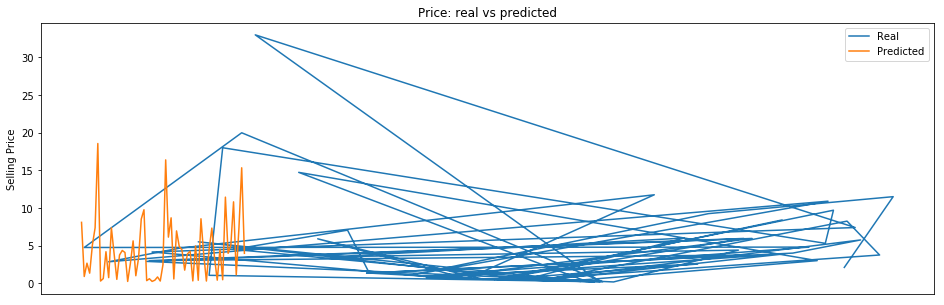

In [31]:
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(y_test, label="Real")
plt.plot(predicted, label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("Selling Price")
plt.xticks(())
plt.show()

In [33]:
import joblib
joblib.dump(knn, 'newknn_joblib')

['newknn_joblib']